# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pandas import json_normalize


# Import the OpenWeatherMap API key
    #make sure api key is in quotations in api_key file
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
##zip returns an iterator in Python 3, so if you want to create a list from it, you can use the list() constructor:
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list via append function
    if city not in cities:
        cities.append(city)
    

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
# Base URL for the OpenWeatherMap current weather endpoint
base_url = "https://api.openweathermap.org/data/2.5/weather"

# Set common parameters in the base URL
unit = "metric"
base_url_params = f"?appid={weather_api_key}&units={unit}"
    #   params = {"q":city_list["City"][0], "units":"metric", "appid":weather_api_key}

# Construct the complete query URL
query_url = f"{base_url}{base_url_params}&q="

    ##Other methods examples: query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    ##Example: city_name = "London"
    #final_url = f"{query_url}{city_name}"



# Define an empty list to fetch the weather data for each city
city_data = []
lat = []
lon = []

temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters to go through data
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city, same as query endpoint
    city_url = f"{query_url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities, see above
    try:
        
        # Parse the JSON and retrieve data
    
        city_weather = requests.get(city_url).json()
       
     
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

       

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kathu
Processing Record 2 of Set 1 | argo
Processing Record 3 of Set 1 | egilsstadir
Processing Record 4 of Set 1 | macapa
Processing Record 5 of Set 1 | atafu village
Processing Record 6 of Set 1 | plastun
Processing Record 7 of Set 1 | vernon
Processing Record 8 of Set 1 | soure
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | cambria
Processing Record 12 of Set 1 | yingchuan
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | rockford
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | brookings
Processing Record 18 of Set 1 | castro de rei
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | tahe
Processing Record 21 of Set 1 | dzhalagash
Processing Record 22 of Set 1 | kailua-kona
Processing 

In [36]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)


city_data_df = json_normalize(city_data)


# Show Record Count

city_data_df.count()

lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kathu,7.9178,98.3332,23.90,83,13,4.71,TH,1704754012
1,argo,37.6333,22.7333,9.32,80,89,1.09,GR,1704754012
2,egilsstadir,65.2653,-14.3948,5.95,65,0,4.12,IS,1704754013
3,macapa,0.0389,-51.0664,25.57,88,99,4.07,BR,1704754013
4,atafu village,-8.5421,-172.5159,29.01,71,10,3.59,TK,1704754014
...,...,...,...,...,...,...,...,...,...
576,fraga,41.5229,0.3489,3.07,72,69,1.29,ES,1704754303
577,riohacha,11.5444,-72.9072,32.06,48,0,7.20,CO,1704754304
578,smidovich,48.6000,133.8167,-28.61,98,43,2.58,RU,1704754304
579,hilo,19.7297,-155.0900,28.40,69,20,1.54,US,1704754305


In [37]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kathu,7.9178,98.3332,23.90,83,13,4.71,TH,1704754012
1,argo,37.6333,22.7333,9.32,80,89,1.09,GR,1704754012
2,egilsstadir,65.2653,-14.3948,5.95,65,0,4.12,IS,1704754013
3,macapa,0.0389,-51.0664,25.57,88,99,4.07,BR,1704754013
4,atafu village,-8.5421,-172.5159,29.01,71,10,3.59,TK,1704754014


In [40]:
# Export the City_Data into a csv

city_data_df.to_csv("../WeatherPy/output_data/cities.csv", index_label="City_ID")



In [42]:
# Read saved data
city_data_df = pd.read_csv("../WeatherPy/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kathu,7.9178,98.3332,23.90,83,13,4.71,TH,1704754012
1,argo,37.6333,22.7333,9.32,80,89,1.09,GR,1704754012
2,egilsstadir,65.2653,-14.3948,5.95,65,0,4.12,IS,1704754013
3,macapa,0.0389,-51.0664,25.57,88,99,4.07,BR,1704754013
4,atafu village,-8.5421,-172.5159,29.01,71,10,3.59,TK,1704754014


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

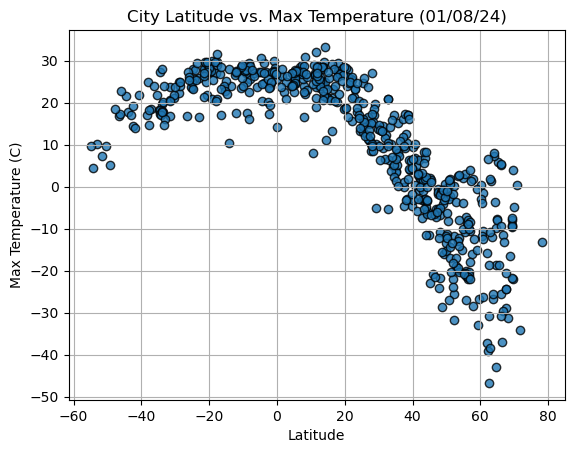

In [43]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=lats, y=max_temps, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

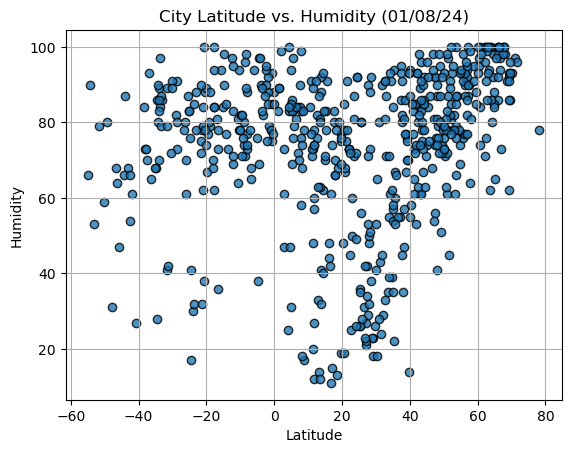

In [44]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=lats, y=humidity, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

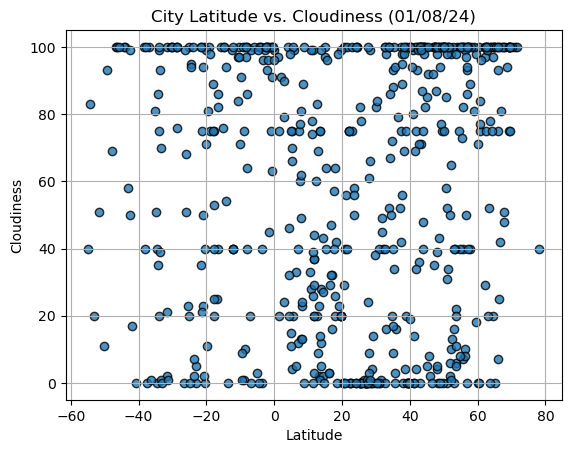

In [45]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=lats, y=cloudiness, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

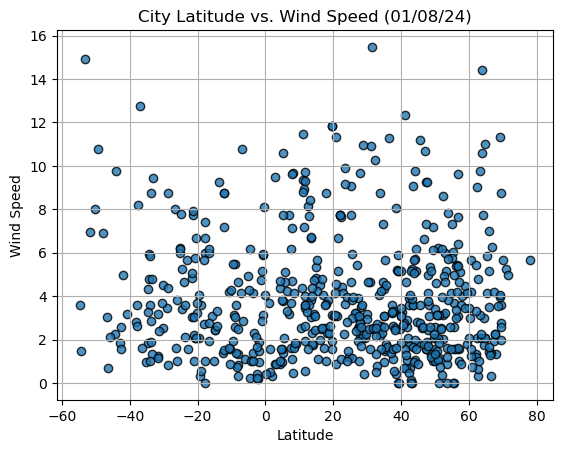

In [46]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=lats, y=wind_speed, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(f'{y_label}')
    plt.grid()

In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_pd.loc[city_data_pd["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kathu,7.9178,98.3332,23.90,83,13,4.71,TH,1704754012
1,argo,37.6333,22.7333,9.32,80,89,1.09,GR,1704754012
2,egilsstadir,65.2653,-14.3948,5.95,65,0,4.12,IS,1704754013
3,macapa,0.0389,-51.0664,25.57,88,99,4.07,BR,1704754013
5,plastun,44.7561,136.2939,-11.53,71,100,2.82,RU,1704754014


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_pd.loc[city_data_pd["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,atafu village,-8.5421,-172.5159,29.01,71,10,3.59,TK,1704754014
7,soure,-0.7167,-48.5233,26.85,85,100,5.89,BR,1704753778
8,puerto ayora,-0.7393,-90.3518,29.98,93,91,3.13,EC,1704754015
9,port-aux-francais,-49.3500,70.2167,5.07,80,93,10.78,TF,1704754016
12,edinburgh of the seven seas,-37.0676,-12.3116,18.53,93,100,12.74,SH,1704754017


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.8691584856885827
y = -0.79x + 34.21


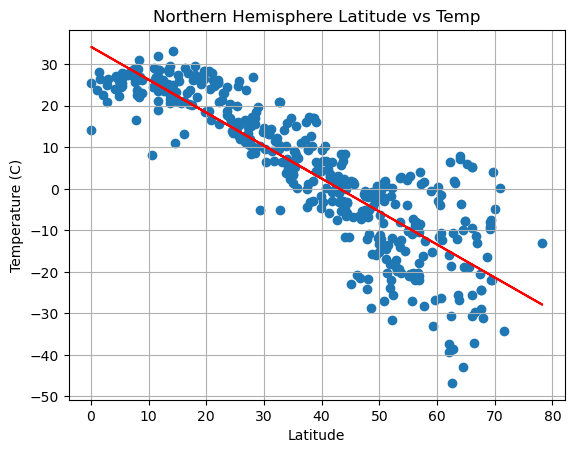

In [50]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (C)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Northern Hemisphere Latitude vs Temp.png")
plt.show()

The r-square is 0.623664046796255
y = 0.24x + 28.4


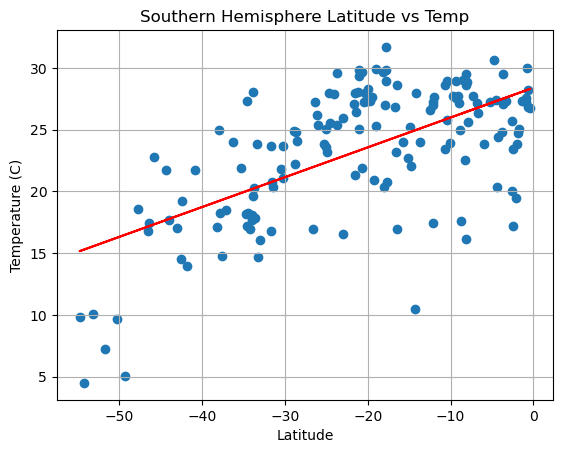

In [51]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (C)"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Temp')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Temp.png")
plt.show()

**Discussion about the linear relationship:** The result reveals a strong correlation (negative sloping in the Northern Hemisphere and positive sloping in the Southern) between distance from the equator temperature. The closer to the equator, the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.40393940384554977
y = 0.47x + 55.8


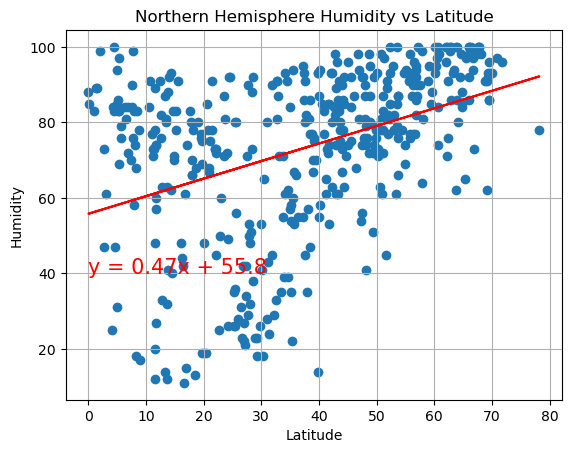

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Humidity"
#give the title
plt.title(f'Northern Hemisphere Humidity vs Latitude')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Northern Hemisphere Latitude vs Humidity.png")
plt.show()

The r-square is 0.298285520125396
y = 0.35x + 83.47


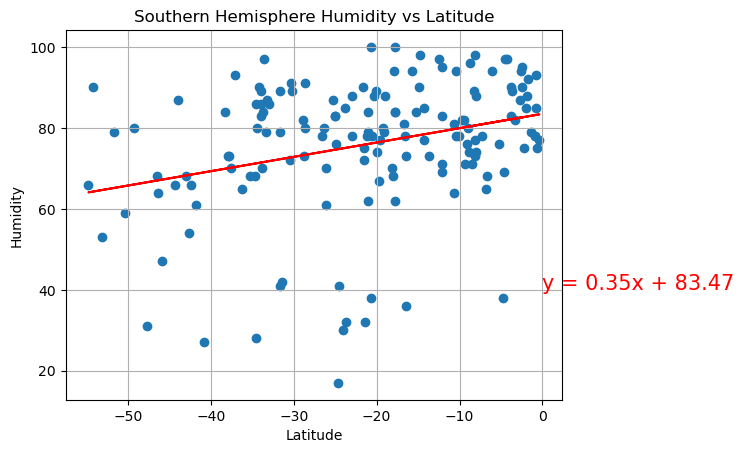

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Humidity"
#give the title
plt.title(f'Southern Hemisphere Humidity vs Latitude')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Humidity.png")
plt.show()

**Discussion about the linear relationship:** With a low r-square (0.298) and slope of only 0.35, there does not appear to be any particular correlation between randomly chosen cities' humidity and their latitudes.

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.2874149911860401
y = 0.59x + 34.56


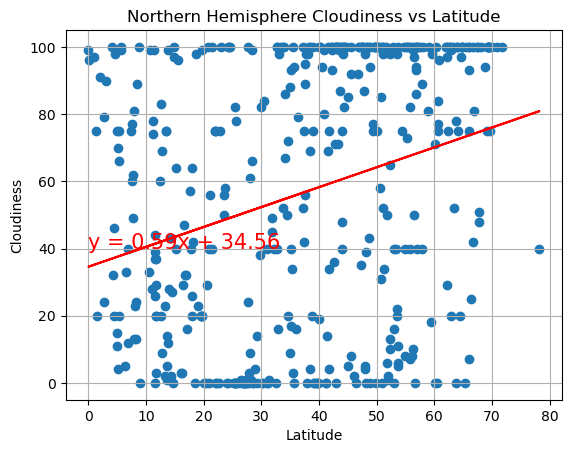

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Cloudiness"
#give the title
plt.title(f'Northern Hemisphere Cloudiness vs Latitude')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Northern Hemisphere Latitude vs Cloudiness.png")
plt.show()

The r-square is 0.13924228287543056
y = 0.38x + 71.78


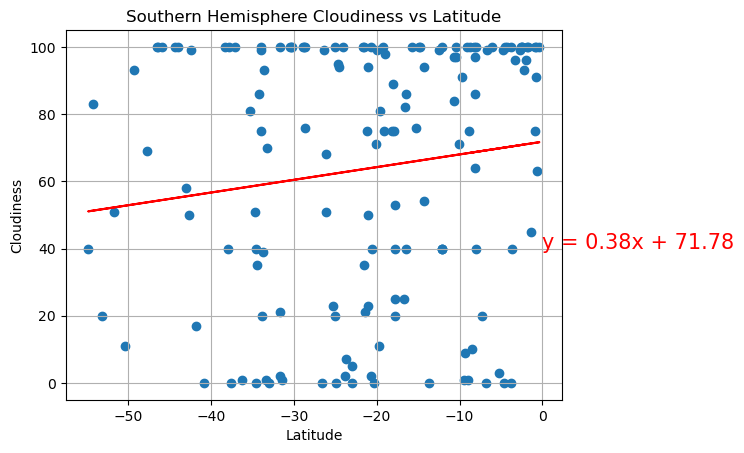

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Cloudiness"
#give the title
plt.title(f'Southern Hemisphere Cloudiness vs Latitude')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Cloudiness.png")
plt.show()

**Discussion about the linear relationship:** The result reveals no correlation between latitude and cloudiness in either the Northern or Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is -0.05498214028993245
y = -0.01x + 4.11


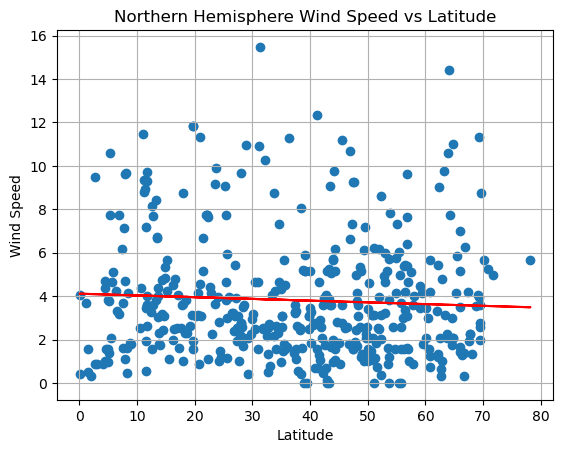

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Wind Speed"
#give the title
plt.title(f'Northern Hemisphere Wind Speed vs Latitude')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Northern Hemisphere Latitude vs Wind Speed.png")
plt.show()

The r-square is -0.2237026989897612
y = -0.04x + 2.89


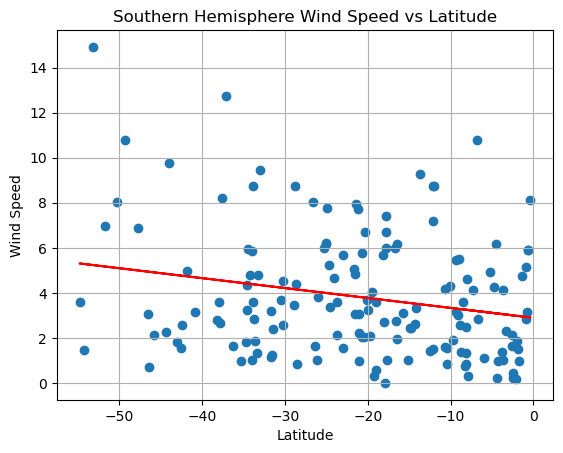

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Wind Speed"
#give the title
plt.title(f'Southern Hemisphere Wind Speed vs Latitude')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/Southern Hemisphere Latitude vs Wind Speed.png")
plt.show()

**Discussion about the linear relationship:** The result reveals no correlation between latitude and wind speed.

In [ ]:
WeatherPy
Observable Trends Based on the Data
There is a strong, negative correlation between a city's latitude and maximum temperature in the northern hemisphere. That is, as you go farther away from the equator (latitude increases), a city's maximum temperature will generally be lower than cities closer to the equator in the northern hemisphere. This is what I expected to see - for example, it's a lot colder in Minnesota (farther north) than it is in Mexico.
There is a very weak, positive correlation between cloudiness and a city's latitude for both the northern and southern hemispheres. This is represented in the scatter plots in this notebook for those two factors as the data points being scattered across the graph. As a result, we can conclude that a city's latitude has little to no influence on how cloudy a city is.
There is a very weak, positive correlation for the northern hemisphere between a city's latitude and wind speed (mph), and there is a very weak, negative correlation for the southern hemisphere for those same two factors. I think the fact that the southern hemisphere has a negative correlation and the northern hemisphere has a positive correlation has to have something to do with the northern hemisphere and southern hemisphere being in opposite seasons from each other. Overall, for both hemispheres, latitude has a small influence on wind speed but not very much. However, it is important to note that the correlation between these two factors for the southern hemisphere is stronger than the correlation between these two factors for the northern hemisphere.